# HW3 Exploratory Data Analysis


In [53]:
#basics
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

### Load data

In [54]:
train = pd.read_csv('/Users/dariyab/Desktop/projector/Machine Learning/2.0 Pandas - Toxic Comments EDA/HW3/train_1.csv')

In [55]:
train.sample(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
48409,Topinambur_de.wikipedia.org_all-access_spider,7.0,3.0,2.0,5.0,5.0,3.0,15.0,12.0,5.0,...,19.0,11.0,15.0,8.0,8.0,9.0,14.0,15.0,17.0,14.0
104432,Ацефал_(журнал)_ru.wikipedia.org_desktop_all-agents,1.0,3.0,7.0,2.0,4.0,6.0,1.0,3.0,9.0,...,7.0,7.0,8.0,5.0,9.0,10.0,8.0,10.0,10.0,5.0
12537,Marvel_Comics_en.wikipedia.org_desktop_all-agents,2335.0,2248.0,1926.0,1846.0,1944.0,2383.0,2333.0,2404.0,2532.0,...,1708.0,1375.0,1542.0,1135.0,1506.0,1649.0,1846.0,1814.0,1722.0,1388.0
35164,Gone_Girl_(film)_en.wikipedia.org_all-access_spider,75.0,69.0,66.0,66.0,52.0,61.0,53.0,95.0,90.0,...,37.0,33.0,43.0,31.0,34.0,39.0,20.0,40.0,34.0,47.0
112962,"Saint-Germain-le-Gaillard,_Manche_en.wikipedia.org_all-access_all-agents",NaN,4.0,5.0,5.0,9.0,6.0,8.0,13.0,19.0,...,1.0,3.0,6.0,4.0,4.0,7.0,NaN,5.0,3.0,4.0
62466,辽沈战役_zh.wikipedia.org_desktop_all-agents,39.0,70.0,68.0,65.0,87.0,78.0,60.0,77.0,78.0,...,108.0,54.0,56.0,47.0,79.0,81.0,85.0,88.0,61.0,91.0
59703,ビッチ_ja.wikipedia.org_mobile-web_all-agents,1529.0,1546.0,1565.0,2088.0,2314.0,1743.0,1526.0,1697.0,1632.0,...,643.0,616.0,612.0,678.0,659.0,593.0,615.0,623.0,660.0,541.0
64623,菲律賓訴中國案_zh.wikipedia.org_desktop_all-agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,9.0,3.0,10.0,7.0,3.0,4.0,6.0,4.0,8.0
20243,Special:MyLanguage/API:Lists_www.mediawiki.org_all-access_all-agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,17.0,16.0,10.0,19.0,35.0,21.0,22.0,25.0,25.0
63347,蔡思貝_zh.wikipedia.org_desktop_all-agents,224.0,216.0,172.0,211.0,174.0,135.0,152.0,164.0,175.0,...,268.0,227.0,174.0,209.0,270.0,168.0,306.0,280.0,235.0,199.0


In [56]:
train.shape

(145063, 551)

## 1 Вікіпедії яких країн доступні в цьому датасеті?


In [57]:
#extracting three words but I want three characters
import re
import string

input_string = "UFC_202_en.wikipedia.org_mobile-web_all-agents"

match = re.search(r'(..)(?=.wikipedia)', input_string)

if match:
    result = match.group(1)
    print(result)

en


In [58]:
extract_country = lambda x: re.search(r'(..)(?=.wikipedia)', x).group(1) if re.search(r'(..)(?=.wikipedia)', x) else None


In [59]:
train['country_abbrev'] = train['Page'].apply(extract_country)

In [60]:
train.sample(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,country_abbrev
44809,File:Prise_de_la_Bastille.jpg_commons.wikimedia.org_all-access_all-agents,55.0,71.0,63.0,58.0,45.0,62.0,34.0,73.0,42.0,...,41.0,33.0,28.0,47.0,42.0,41.0,29.0,45.0,37.0,None
73285,David_Carr_(American_football)_en.wikipedia.org_mobile-web_all-agents,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,...,1608.0,7523.0,13370.0,5908.0,6156.0,2935.0,2540.0,3280.0,1628.0,en
19261,Форсаж_6_ru.wikipedia.org_mobile-web_all-agents,229.0,243.0,212.0,237.0,254.0,239.0,189.0,197.0,237.0,...,144.0,187.0,187.0,139.0,148.0,147.0,152.0,136.0,126.0,ru
22929,Wikimedia_www.mediawiki.org_mobile-web_all-agents,9.0,18.0,11.0,10.0,23.0,18.0,11.0,12.0,8.0,...,0.0,2.0,3.0,6.0,4.0,2.0,4.0,5.0,2.0,None
85490,3月11日_ja.wikipedia.org_desktop_all-agents,97.0,69.0,76.0,67.0,80.0,91.0,78.0,61.0,92.0,...,63.0,73.0,61.0,60.0,84.0,62.0,49.0,79.0,52.0,ja
126995,"Кадыров,_Ахмат_Абдулхамидович_ru.wikipedia.org_all-access_spider",10.0,9.0,15.0,11.0,28.0,13.0,10.0,11.0,7.0,...,21.0,33.0,20.0,16.0,46.0,27.0,20.0,15.0,19.0,ru
40259,Kalabhavan_Mani_en.wikipedia.org_all-access_all-agents,454.0,653.0,1278.0,1607.0,1733.0,1629.0,1152.0,1093.0,1119.0,...,448.0,409.0,440.0,474.0,461.0,523.0,436.0,508.0,649.0,en
134857,はじめの一歩_ja.wikipedia.org_all-access_spider,4.0,2.0,2.0,3.0,1.0,3.0,16.0,9.0,12.0,...,101.0,84.0,112.0,81.0,66.0,78.0,77.0,134.0,138.0,ja
93828,Mi_adorable_maldición_es.wikipedia.org_all-access_all-agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es
36523,The_Blacklist_(TV_series)_en.wikipedia.org_all-access_spider,36.0,39.0,20.0,28.0,39.0,45.0,30.0,30.0,28.0,...,63.0,41.0,46.0,34.0,65.0,67.0,42.0,34.0,56.0,en


In [61]:
unique_countries = train['country_abbrev'].unique()
unique_countries

array(['zh', 'fr', 'en', None, '02', 'ru', ':P', 'de', 'ja', 'es'],
      dtype=object)


## Answer: France, China, English speaking, Germany, Japan, Spain 

## 2. Скільки сторінок з французької Вікіпедії у датасеті? 

### 17802 сторінок з французької у Вікіпедії



In [62]:
print(train['country_abbrev'].value_counts()['fr'])


17802


## 3. Вивести топ-3 статі для кожної країни за квітень 2016 року.


In [63]:
train2 = train

In [64]:
train3 = train2.filter(regex='2016-04').columns #getting a column index for 2016-04

In [65]:
train2 = train2[train3]

In [66]:
train2['country'] = train['country_abbrev']
train2['Page'] = train['Page']
train2.head()

,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,country,Page
0,12.0,14.0,13.0,9.0,490.0,189.0,102.0,38.0,126.0,71.0,...,31.0,17.0,25.0,40.0,19.0,15.0,15.0,29.0,zh,2NE1_zh.wikipedia.org_all-access_spider
1,25.0,18.0,18.0,16.0,20.0,17.0,16.0,13.0,15.0,19.0,...,17.0,41.0,35.0,16.0,9.0,64.0,22.0,22.0,zh,2PM_zh.wikipedia.org_all-access_spider
2,4.0,155.0,155.0,83.0,48.0,31.0,16.0,6.0,13.0,8.0,...,6.0,5.0,2.0,7.0,3.0,7.0,6.0,3.0,zh,3C_zh.wikipedia.org_all-access_spider
3,18.0,18.0,23.0,27.0,39.0,11.0,16.0,9.0,26.0,14.0,...,14.0,23.0,21.0,11.0,19.0,9.0,10.0,11.0,zh,4minute_zh.wikipedia.org_all-access_spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,2.0,0.0,5.0,0.0,3.0,55.0,234.0,zh,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider


In [67]:
train2['total_views'] = train2.sum(axis = 1, numeric_only = True)
train2.head()

,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,country,Page,total_views
0,12.0,14.0,13.0,9.0,490.0,189.0,102.0,38.0,126.0,71.0,...,17.0,25.0,40.0,19.0,15.0,15.0,29.0,zh,2NE1_zh.wikipedia.org_all-access_spider,1598.0
1,25.0,18.0,18.0,16.0,20.0,17.0,16.0,13.0,15.0,19.0,...,41.0,35.0,16.0,9.0,64.0,22.0,22.0,zh,2PM_zh.wikipedia.org_all-access_spider,699.0
2,4.0,155.0,155.0,83.0,48.0,31.0,16.0,6.0,13.0,8.0,...,5.0,2.0,7.0,3.0,7.0,6.0,3.0,zh,3C_zh.wikipedia.org_all-access_spider,636.0
3,18.0,18.0,23.0,27.0,39.0,11.0,16.0,9.0,26.0,14.0,...,23.0,21.0,11.0,19.0,9.0,10.0,11.0,zh,4minute_zh.wikipedia.org_all-access_spider,651.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,5.0,0.0,3.0,55.0,234.0,zh,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,529.0


## топ-3 статі для кожної країни за квітень 2016 року

In [68]:
pd.options.display.max_colwidth = -1
max_views = train2.groupby('country', as_index=False).apply(lambda x: x.nlargest(3, 'total_views')).iloc[4:]
top_three = max_views[['country','Page']]
top_three

/Users/dariyab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


country  \
2 139119  de       
  116196  de       
  67049   de       
3 38573   en       
  9774    en       
  74114   en       
4 92205   es       
  95855   es       
  90810   es       
5 27330   fr       
  26993   fr       
  7213    fr       
6 120336  ja       
  86431   ja       
  57309   ja       
7 99322   ru       
  103123  ru       
  17670   ru       
8 28727   zh       
  61350   zh       
  28728   zh       

                                                                                                   Page  
2 139119  Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents                                    
  116196  Wikipedia:Hauptseite_de.wikipedia.org_mobile-web_all-agents                                    
  67049   Wikipedia:Hauptseite_de.wikipedia.org_desktop_all-agents                                       
3 38573   Main_Page_en.wikipedia.org_all-access_all-agents                                               
  9774    Main_Page_en.wikipedia.org_desktop_all-agents                                                  
  74114   Main_Page_en.wikipedia.org_mobile-web_all-agents                                               
4 92205   Wikipedia:Portada_es.wikipedia.org_all-access_all-agents                                       
  95855   Wikipedia:Portada_es.wikipedia.org_mobile-web_all-agents                                       
  90810   Especial:Buscar_es.wikipedia.org_all-access_all-agents                                         
5 27330   Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents                             
  26993   Organisme_de_placement_collectif_en_valeurs_mobilières_fr.wikipedia.org_all-access_all-agents  
  7213    Organisme_de_placement_collectif_en_valeurs_mobilières_fr.wikipedia.org_desktop_all-agents     
6 120336  メインページ_ja.wikipedia.org_all-access_all-agents                                                  
  86431   メインページ_ja.wikipedia.org_desktop_all-agents                                                     
  57309   メインページ_ja.wikipedia.org_mobile-web_all-agents                                                  
7 99322   Заглавная_страница_ru.wikipedia.org_all-access_all-agents                                      
  103123  Заглавная_страница_ru.wikipedia.org_desktop_all-agents                                         
  17670   Заглавная_страница_ru.wikipedia.org_mobile-web_all-agents                                      
8 28727   Wikipedia:首页_zh.wikipedia.org_all-access_all-agents                                            
  61350   Wikipedia:首页_zh.wikipedia.org_desktop_all-agents                                               
  28728   Special:搜索_zh.wikipedia.org_all-access_all-agents

##  5. Знайти сторінку англійської вікіпедії з найбільшим середнім/медіаною/дисперсією за липень 2016 року. 


In [70]:
train3 = train.filter(regex='2016-07').columns #new index

In [71]:
july_articles = train[train3]
july_articles.head()
july_articles['country'] = train['country_abbrev']
july_articles['Page'] = train['Page']
july_articles.head()

,2016-07-01,2016-07-02,2016-07-03,2016-07-04,2016-07-05,2016-07-06,2016-07-07,2016-07-08,2016-07-09,2016-07-10,...,2016-07-24,2016-07-25,2016-07-26,2016-07-27,2016-07-28,2016-07-29,2016-07-30,2016-07-31,country,Page
0,20.0,17.0,15.0,16.0,18.0,21.0,15.0,30.0,115.0,56.0,...,13.0,18.0,17.0,31.0,26.0,29.0,12.0,19.0,zh,2NE1_zh.wikipedia.org_all-access_spider
1,13.0,11.0,12.0,28.0,28.0,17.0,27.0,48.0,184.0,64.0,...,19.0,18.0,18.0,17.0,35.0,49.0,19.0,25.0,zh,2PM_zh.wikipedia.org_all-access_spider
2,5.0,4.0,2.0,4.0,3.0,4.0,2.0,0.0,1.0,3.0,...,11.0,6.0,2.0,2.0,3.0,7.0,5.0,4.0,zh,3C_zh.wikipedia.org_all-access_spider
3,19.0,20.0,11.0,36.0,19.0,35.0,22.0,14.0,17.0,15.0,...,8.0,13.0,16.0,8.0,19.0,14.0,9.0,13.0,zh,4minute_zh.wikipedia.org_all-access_spider
4,10.0,1.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,9.0,...,2.0,10.0,5.0,3.0,10.0,2.0,5.0,7.0,zh,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider


In [72]:
#filter july articles for only the English pages 

july_articles_en = july_articles[july_articles['country'] == 'en'] 
july_articles_en.head()

,2016-07-01,2016-07-02,2016-07-03,2016-07-04,2016-07-05,2016-07-06,2016-07-07,2016-07-08,2016-07-09,2016-07-10,...,2016-07-24,2016-07-25,2016-07-26,2016-07-27,2016-07-28,2016-07-29,2016-07-30,2016-07-31,country,Page
8357,5.0,1.0,3.0,3.0,2.0,4.0,2.0,7.0,2.0,NaN,...,10.0,1.0,3.0,5.0,9.0,3.0,2.0,1.0,en,!vote_en.wikipedia.org_desktop_all-agents
8358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_all-agents"
8359,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,en,"""European_Society_for_Clinical_Investigation""_en.wikipedia.org_desktop_all-agents"
8360,1575.0,1193.0,3613.0,2118.0,1730.0,1596.0,1638.0,1606.0,2334.0,1396.0,...,1786.0,1893.0,1828.0,1753.0,1667.0,1556.0,1315.0,1316.0,en,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_all-agents"
8361,829.0,1775.0,1079.0,3311.0,1495.0,1131.0,1160.0,1779.0,1166.0,1155.0,...,1719.0,2100.0,1816.0,1938.0,1870.0,1665.0,1308.0,1156.0,en,100_metres_en.wikipedia.org_desktop_all-agents


In [73]:
#statistics per page 
july_articles_en['mean'] = july_articles_en.mean(axis=1)
july_articles_en['median'] = july_articles_en.median(axis = 1)
july_articles_en['std'] = july_articles_en.std(axis=1)

july_articles_en.head(5)


,2016-07-01,2016-07-02,2016-07-03,2016-07-04,2016-07-05,2016-07-06,2016-07-07,2016-07-08,2016-07-09,2016-07-10,...,2016-07-27,2016-07-28,2016-07-29,2016-07-30,2016-07-31,country,Page,mean,median,std
8357,5.0,1.0,3.0,3.0,2.0,4.0,2.0,7.0,2.0,NaN,...,5.0,9.0,3.0,2.0,1.0,en,!vote_en.wikipedia.org_desktop_all-agents,2.933333,2.0,2.276886
8358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,en,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_all-agents",NaN,NaN,NaN
8359,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,en,"""European_Society_for_Clinical_Investigation""_en.wikipedia.org_desktop_all-agents",1.300000,1.0,0.616626
8360,1575.0,1193.0,3613.0,2118.0,1730.0,1596.0,1638.0,1606.0,2334.0,1396.0,...,1753.0,1667.0,1556.0,1315.0,1316.0,en,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_all-agents",1739.354839,1613.0,479.563045
8361,829.0,1775.0,1079.0,3311.0,1495.0,1131.0,1160.0,1779.0,1166.0,1155.0,...,1938.0,1870.0,1665.0,1308.0,1156.0,en,100_metres_en.wikipedia.org_desktop_all-agents,1435.870968,1295.5,479.515133


In [74]:
top_page = july_articles_en.sort_values(by=['mean', 'median', 'std'], ascending = False).head(5)
top_page['Page']

38573    Main_Page_en.wikipedia.org_all-access_all-agents     
9774     Main_Page_en.wikipedia.org_desktop_all-agents        
74114    Main_Page_en.wikipedia.org_mobile-web_all-agents     
39180    Special:Search_en.wikipedia.org_all-access_all-agents
10403    Special:Search_en.wikipedia.org_desktop_all-agents   
Name: Page, dtype: object


## Answer:  Main_Page_en.wikipedia.org_all-access_all-agents

## 6. Візуалізувати кількість переглядів для топ-5 сторінок англійської Вікіпедії на одному графіку за перше півріччя 2016 року. Visualize the number of views for the top 5 pages from the english wikipedia (bar graph) 

In [75]:
train5 = train.filter(regex=r'(2016-01|2016-02|2016-03|2016-04|2016-05|2016-06)').columns
firsthalf_2016 = train[train5]
firsthalf_2016['country'] = train['country_abbrev']
firsthalf_2016['Page'] = train['Page']
firsthalf_2016.head()
firsthalf_2016['total_views'] = firsthalf_2016.sum(axis = 1, numeric_only = True)
firsthalf_2016_en = firsthalf_2016[firsthalf_2016['country'] == 'en'] 
firsthalf_2016_en.head()

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,...,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,country,Page,total_views
8357,3.0,2.0,2.0,2.0,3.0,0.0,1.0,1.0,4.0,2.0,...,4.0,1.0,2.0,2.0,1.0,3.0,4.0,en,!vote_en.wikipedia.org_desktop_all-agents,573.0
8358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_all-agents",0.0
8359,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,en,"""European_Society_for_Clinical_Investigation""_en.wikipedia.org_desktop_all-agents",67.0
8360,1169.0,1189.0,1267.0,1372.0,1376.0,1541.0,1410.0,1456.0,1181.0,1477.0,...,1528.0,1469.0,1381.0,1342.0,1482.0,1434.0,1767.0,en,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_all-agents",584202.0
8361,356.0,496.0,446.0,563.0,826.0,739.0,704.0,710.0,506.0,632.0,...,810.0,786.0,906.0,1063.0,1030.0,1155.0,925.0,en,100_metres_en.wikipedia.org_desktop_all-agents,154090.0


In [76]:
top_five = firsthalf_2016_en.sort_values(by=['total_views'], ascending = False)[0:5]
top_five

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,...,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,country,Page,total_views
38573,16357307.0,17614566.0,17537448.0,19232035.0,18142931.0,18377878.0,17277663.0,16437934.0,16439118.0,17278324.0,...,17865705.0,19308710.0,20247955.0,18666240.0,20016297.0,19576627.0,23209383.0,en,Main_Page_en.wikipedia.org_all-access_all-agents,3.287061e+09
9774,9170612.0,10333223.0,10160444.0,12163450.0,10957266.0,11417741.0,10467866.0,9820057.0,9665577.0,10513942.0,...,12504182.0,14098393.0,14850970.0,13359608.0,14923570.0,14330879.0,15284126.0,en,Main_Page_en.wikipedia.org_desktop_all-agents,2.204460e+09
74114,6920930.0,7011530.0,7093516.0,6827320.0,6951483.0,6730292.0,6580284.0,6386762.0,6520497.0,6496216.0,...,5166741.0,5008360.0,5181315.0,5112765.0,4903957.0,5059084.0,7740443.0,en,Main_Page_en.wikipedia.org_mobile-web_all-agents,1.045327e+09
39180,1794204.0,1811792.0,1888684.0,2123412.0,2147114.0,2339089.0,2378508.0,2210156.0,1946522.0,2063624.0,...,1859212.0,1535125.0,1651204.0,2105739.0,2110458.0,2429900.0,2425386.0,en,Special:Search_en.wikipedia.org_all-access_all-agents,3.788434e+08
10403,1401667.0,1395136.0,1455522.0,1750373.0,1787494.0,1952324.0,1972186.0,1804425.0,1483316.0,1576497.0,...,1525665.0,1186263.0,1282109.0,1725856.0,1715507.0,2010241.0,2012923.0,en,Special:Search_en.wikipedia.org_desktop_all-agents,3.095593e+08


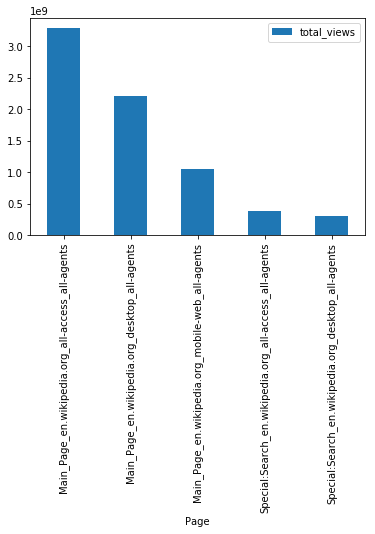

In [77]:
#plotting the top 5 pages for the first half of july 
ax = top_five.plot.bar(x='Page', y='total_views', rot = 90)

## 7. Порівняти розподіли німецьких і французьких сторінок вікіпедії за червень 2016 року.

In [78]:
import seaborn as sns
#sns.violinplot(df.gender, df.award_age)
#sns.boxplot(df.gender, df.award_age)


In [79]:
train4 = train.filter(regex='2016-06').columns #new index
june_articles = train[train4]
june_articles.head()
june_articles['country'] = train['country_abbrev']
june_articles['Page'] = train['Page']


june_articles.head()


,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,...,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,country,Page
0,21.0,27.0,13.0,11.0,15.0,14.0,18.0,18.0,10.0,11.0,...,8.0,22.0,15.0,69.0,11.0,18.0,23.0,12.0,zh,2NE1_zh.wikipedia.org_all-access_spider
1,10.0,11.0,16.0,10.0,12.0,12.0,13.0,9.0,16.0,19.0,...,13.0,24.0,14.0,13.0,14.0,24.0,16.0,15.0,zh,2PM_zh.wikipedia.org_all-access_spider
2,5.0,7.0,7.0,5.0,3.0,4.0,1.0,9.0,3.0,4.0,...,4.0,3.0,5.0,1.0,6.0,5.0,1.0,4.0,zh,3C_zh.wikipedia.org_all-access_spider
3,8.0,12.0,15.0,10.0,25.0,9.0,8.0,8.0,10.0,14.0,...,22.0,20.0,14.0,12.0,8.0,17.0,11.0,15.0,zh,4minute_zh.wikipedia.org_all-access_spider
4,6.0,2.0,8.0,3.0,7.0,8.0,3.0,4.0,5.0,2.0,...,2.0,2.0,1.0,5.0,2.0,2.0,2.0,3.0,zh,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider


In [80]:
languages = ['de', 'fr']
june_articles_de_fr = june_articles[june_articles['country'].isin(languages)]
june_articles_de_fr['total_views'] = june_articles_de_fr.sum(axis = 1, numeric_only = True)

june_articles_de_fr.sample(10)

,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,...,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,country,Page,total_views
53755,7114.0,3955.0,2373.0,5490.0,3395.0,1831.0,1398.0,1198.0,1285.0,5319.0,...,1012.0,1287.0,3251.0,1635.0,945.0,780.0,1371.0,fr,Karim_Benzema_fr.wikipedia.org_mobile-web_all-agents,69480.0
130329,5.0,3.0,3.0,4.0,5.0,5.0,2.0,7.0,3.0,4.0,...,5.0,2.0,3.0,2.0,6.0,2.0,4.0,fr,Philippe_Cousteau_fr.wikipedia.org_all-access_spider,100.0
116388,192.0,118.0,157.0,172.0,250.0,140.0,123.0,151.0,138.0,89.0,...,107.0,167.0,196.0,89.0,124.0,132.0,82.0,de,Broadchurch_de.wikipedia.org_mobile-web_all-agents,4278.0
25314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,Simple_messieurs_de_l'Open_d'Australie_2017_fr.wikipedia.org_all-access_all-agents,0.0
51410,307.0,353.0,607.0,359.0,386.0,358.0,327.0,339.0,328.0,520.0,...,272.0,263.0,234.0,264.0,261.0,338.0,264.0,fr,Colton_Haynes_fr.wikipedia.org_mobile-web_all-agents,9275.0
24603,155.0,120.0,151.0,161.0,224.0,6717.0,2275.0,1106.0,706.0,615.0,...,653.0,562.0,631.0,559.0,397.0,281.0,236.0,fr,Les_Dames_fr.wikipedia.org_all-access_all-agents,47800.0
138582,604.0,635.0,606.0,564.0,620.0,473.0,631.0,643.0,581.0,498.0,...,538.0,520.0,611.0,604.0,747.0,540.0,622.0,de,Raumschiff_Enterprise_de.wikipedia.org_all-access_all-agents,19646.0
27863,367.0,343.0,372.0,558.0,634.0,420.0,359.0,352.0,338.0,372.0,...,1833.0,1851.0,2022.0,1448.0,1160.0,1019.0,1351.0,fr,Divergente_3_:_Au-delà_du_mur_fr.wikipedia.org_all-access_all-agents,25244.0
25306,233.0,231.0,243.0,280.0,281.0,252.0,233.0,235.0,300.0,366.0,...,197.0,208.0,241.0,197.0,224.0,201.0,165.0,fr,Sicario_fr.wikipedia.org_all-access_all-agents,7059.0
116730,945.0,922.0,982.0,1549.0,1577.0,871.0,932.0,884.0,835.0,824.0,...,862.0,1209.0,1427.0,1085.0,1126.0,1006.0,899.0,de,Internet_Movie_Database_de.wikipedia.org_mobile-web_all-agents,30535.0


In [81]:
#filtering nan
june_articles_de_fr_filt = june_articles_de_fr.dropna()
june_articles_de_fr_filt.sort_values(by=['total_views'], ascending = True)[0:5]

,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,...,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,country,Page,total_views
131767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr,Spécial:Liste_de_suivi_fr.wikipedia.org_all-access_spider,0.0
129480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr,Utilisateur:0x010C/script/PopupVandalism.js/box_fr.wikipedia.org_all-access_spider,0.0
130462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr,Sp?cial:Search_fr.wikipedia.org_all-access_spider,0.0
118658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,de,Schmähkritik_(Gedicht)_de.wikipedia.org_mobile-web_all-agents,0.0
50916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,de,Schmähkritik_(Gedicht)_de.wikipedia.org_all-access_spider,0.0


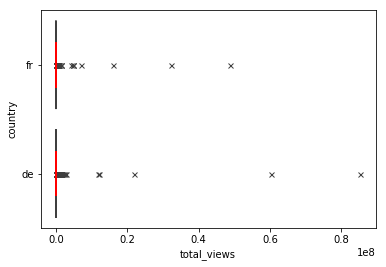

In [82]:
#sb.boxplot(june_articles_de_fr.country,june_articles_de_fr.total_views,)
#sns.boxplot(june_articles_de_fr['country'], june_articles_de_fr['total_views'])

sns.boxplot(
    data=june_articles_de_fr_filt, x="total_views", y="country",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

Text(0.5,0,'Total Views')

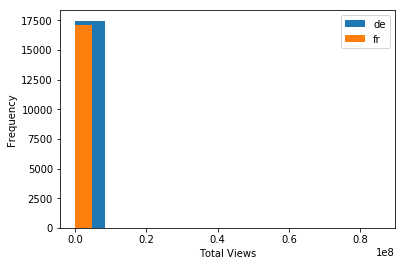

In [83]:
#another way of plotting
import matplotlib.pyplot as plt
june_articles_de_fr_filt.groupby('country')['total_views'].plot(kind='hist')

plt.legend(['de', 'fr'])
plt.xlabel('Total Views') 

## Багато статей мають нуль переглядів

## 8. Порівняти кількість переглядів для сторінок японської вікіпедії з розбивкою по дням тижня.

In [84]:
df_sample = train
df_sample.head()
print(df_sample.shape)


(145063, 552)


In [85]:
#changing the name of the columns to days of the week
#Monday=0, Tuesday=1, Wednesday=2, Thursday=3, Friday=4, Saturday=5, Sunday=6:

for i in range(1,551):#551): 
   # print(df_sample.columns[i])
    col = df_sample.columns[i]
    new_name =  pd.to_datetime(df_sample.columns[i]).dayofweek
    df_sample = df_sample.rename(columns = {df_sample.columns[i]: new_name})

df_sample.head()

,Page,2,3,4,5,6,0,1,2,3,...,4,5,6,0,1,2,3,4,5,country_abbrev
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


In [86]:
#filter the dataframe to include only japan 
df_sample_ja = df_sample[df_sample['country_abbrev'] == 'ja'] 

#sum by weekdays #Monday=0, Tuesday=1, Wednesday=2, Thursday=3, Friday=4, Saturday=5, Sunday=6:

df_sample_ja['monday_total'] = df_sample_ja[0].sum(axis = 1)
df_sample_ja['tuesday_total'] = df_sample_ja[1].sum(axis = 1)
df_sample_ja['wednesday_total'] = df_sample_ja[2].sum(axis = 1)
df_sample_ja['thursday_total'] = df_sample_ja[3].sum(axis = 1)
df_sample_ja['friday_total'] = df_sample_ja[4].sum(axis = 1)
df_sample_ja['saturday_total'] = df_sample_ja[5].sum(axis = 1)
df_sample_ja['sunday_total'] = df_sample_ja[6].sum(axis = 1)

df_sample_ja.head()

,Page,2,3,4,5,6,0,1,2,3,...,4,5,country_abbrev,monday_total,tuesday_total,wednesday_total,thursday_total,friday_total,saturday_total,sunday_total
55714,A-Studio_ja.wikipedia.org_mobile-web_all-agents,102.0,115.0,851.0,568.0,294.0,229.0,145.0,126.0,173.0,...,155.0,159.0,ja,28986.0,17084.0,17438.0,17433.0,113264.0,37943.0,29083.0
55715,A.B.C-Z_ja.wikipedia.org_mobile-web_all-agents,2366.0,1473.0,2292.0,1644.0,1315.0,905.0,733.0,1367.0,1152.0,...,698.0,3824.0,ja,70807.0,64308.0,90335.0,83470.0,96162.0,112088.0,89472.0
55716,ACE_OF_SPADES_ja.wikipedia.org_mobile-web_all-agents,63.0,68.0,53.0,81.0,60.0,56.0,48.0,38.0,47.0,...,80.0,181.0,ja,15060.0,17638.0,19758.0,15282.0,15546.0,48704.0,20114.0
55717,ALEXANDER_ja.wikipedia.org_mobile-web_all-agents,297.0,264.0,286.0,456.0,500.0,256.0,262.0,402.0,271.0,...,554.0,400.0,ja,79068.0,104049.0,117632.0,105301.0,86937.0,138354.0,119682.0
55718,ALL_OUT!!_ja.wikipedia.org_mobile-web_all-agents,0.0,3.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,...,2254.0,1089.0,ja,18446.0,15539.0,15836.0,23609.0,26867.0,30485.0,27730.0


In [87]:

y = [df_sample_ja['monday_total'].sum(),df_sample_ja['tuesday_total'].sum(),df_sample_ja['wednesday_total'].sum(), df_sample_ja['thursday_total'].sum(), df_sample_ja['friday_total'].sum(), df_sample_ja['saturday_total'].sum(),df_sample_ja['sunday_total'].sum()]
x = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']


Text(0.5,0,'Day of the week ')

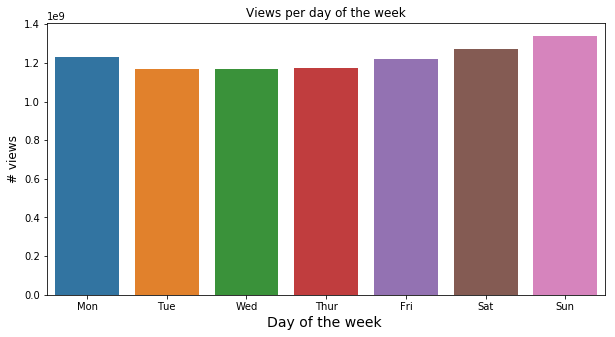

In [88]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x, y)
plt.title("Views per day of the week")
plt.ylabel('# views', fontsize=12)
plt.xlabel('Day of the week ', fontsize=14)
